DATA LOADING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('IRIS.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
dataset.duplicated().sum()

3

In [8]:
dataset.drop_duplicates(inplace = True)

In [9]:
dataset.duplicated().sum()

0

In [10]:
specie_map = {
    'Iris-setosa': 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}
dataset['species'] = dataset['species'].map(specie_map)

In [11]:
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [12]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,1.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


DATA VISUALIZATION

<Axes: xlabel='species', ylabel='sepal_length'>

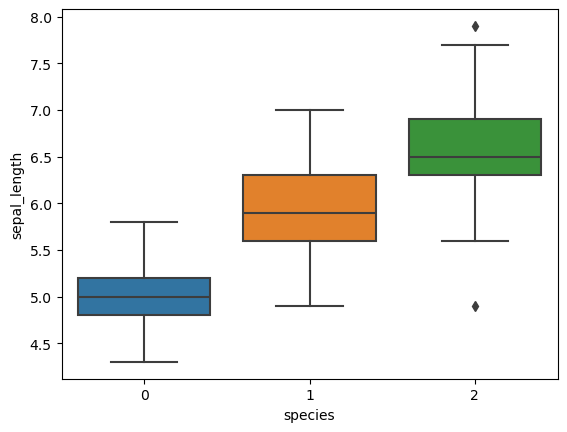

In [13]:
sns.boxplot(x = 'species',y='sepal_length',data = dataset)

<Axes: >

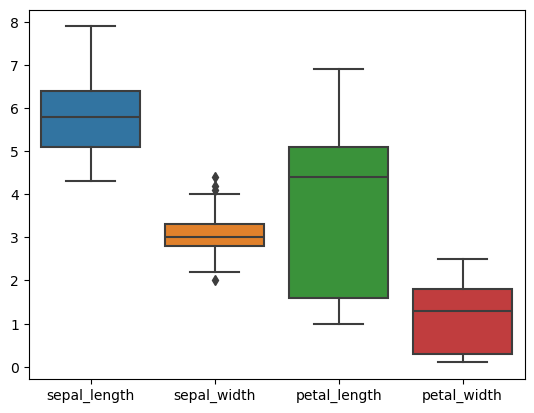

In [14]:
sns.boxplot(data = dataset[['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']])

In [15]:
q1 = dataset[['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']].quantile(0.25)
q3 = dataset[['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']].quantile(0.75)
iqr = q3 -q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

left = (dataset[['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']] >= lower) & (dataset[['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']] <= upper)
print(dataset[left.all(axis = 1)])


     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[143 rows x 5 columns]


C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

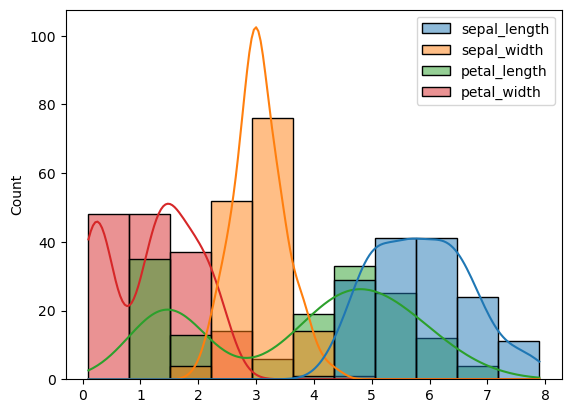

In [16]:
sns.histplot(dataset[['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']], kde =True)

C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

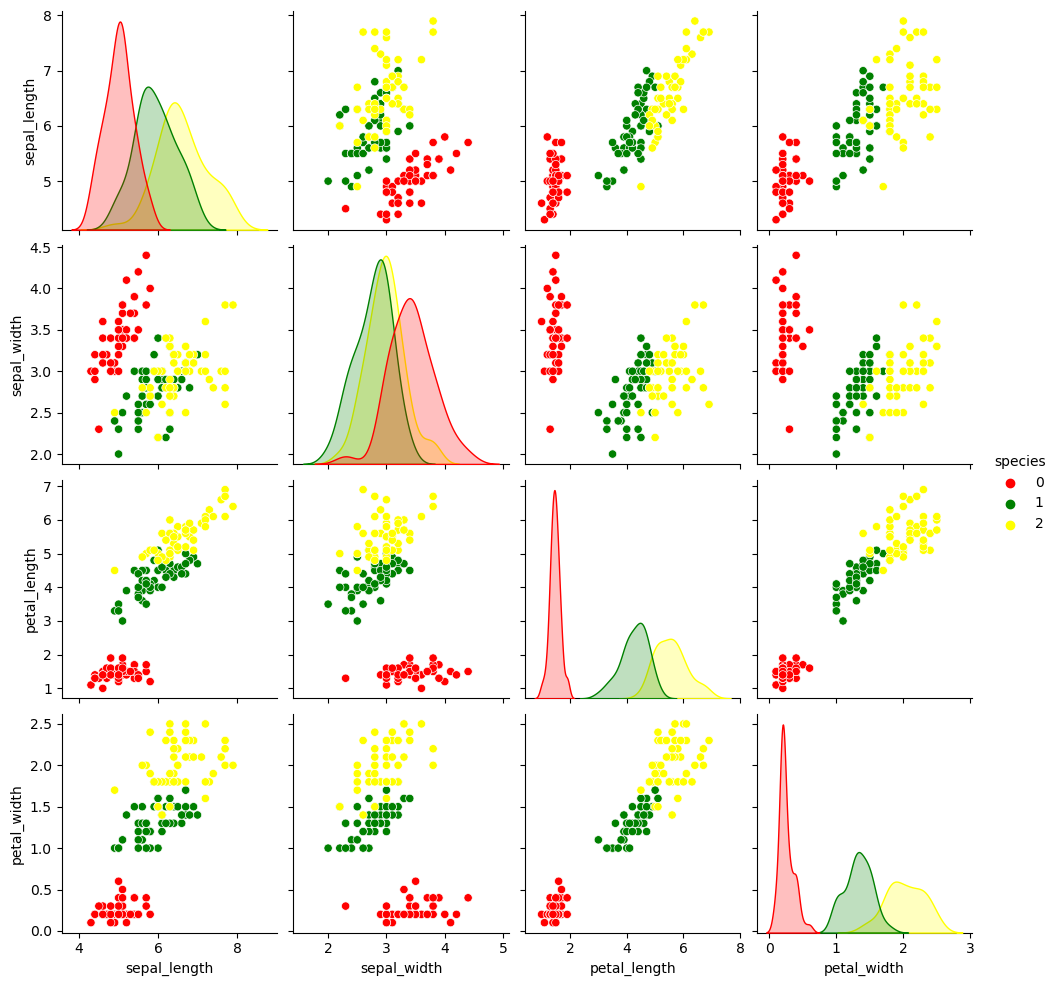

In [17]:
color = ['red','green','yellow']
sns.pairplot(dataset, hue = 'species',palette = color )
plt.show()

              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.109321      0.871305     0.817058  0.782904
sepal_width      -0.109321     1.000000     -0.421057    -0.356376 -0.418348
petal_length      0.871305    -0.421057      1.000000     0.961883  0.948339
petal_width       0.817058    -0.356376      0.961883     1.000000  0.955693
species           0.782904    -0.418348      0.948339     0.955693  1.000000


<Axes: >

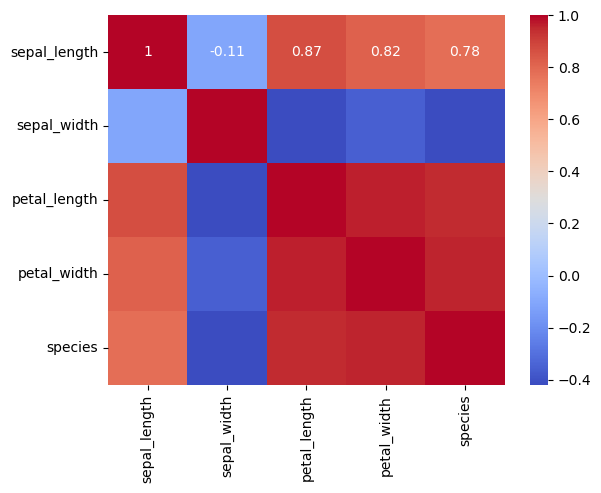

In [18]:
print(dataset.corr())
sns.heatmap(dataset.corr(),annot = True,cmap = 'coolwarm')

In [19]:
x = dataset[['sepal_length' ,'petal_length' ,'petal_width']]
y = dataset['species']

SPLIT THE DATA

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.2, random_state = 42)

x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.fit_transform(x_test))

In [41]:
x_train.hea()

AttributeError: 'DataFrame' object has no attribute 'HEAD'

In [ ]:
TRAIN THE MODEL

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [23]:
models = {
    'lr' : LogisticRegression(),
    'svc' : SVC(),
    'dtc' : DecisionTreeClassifier(),
    'rfc' : RandomForestClassifier(),
    'knc' : KNeighborsClassifier()
}

result = []
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)*100
    prec = precision_score(y_test,y_pred, average = 'weighted' )*100
    result.append({'Model': model, 'Accuracy':acc , 'Precision':prec})

result = pd.DataFrame(result)
result

,Model,Accuracy,Precision
0,LogisticRegression(),96.666667,97.000000
1,SVC(),96.666667,97.000000
2,DecisionTreeClassifier(),93.333333,93.333333
3,"(DecisionTreeClassifier(max_features='sqrt', r...",93.333333,93.333333
4,KNeighborsClassifier(),93.333333,94.545455


In [27]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [38]:
y_pred = svc.predict(x_test)
print(svc.predict([[1.297131 ,	1.206032 ,	1.620088]]))
print(y_test.iloc[2])

[2]
2


In [31]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [35]:
x_test.head(3)

,0,1,2
0,0.567495,0.796877,0.844514
1,-0.162141,0.270821,0.198202
2,1.297131,1.206032,1.620088
